In [1]:
# House-hunting fields from WPRDC's dataset called "Parcels n'at": http://tools.wprdc.org/parcels-n-at/#

In [2]:
# loading tidyverse
library(tidyverse)
# loading neighborhoods
# made a dataset taken from multiple csvs broken up by East Busway neighborhoods taken from Property Information Extractor
eastbuswaydataset <- read.csv("~/Documents/R/eastbuswaydataset.csv")
# displays values on visualizations without using scientific notation
options(scipen=10000)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
# using one of the neighborhood datasets to view column names
names(eastbuswaydataset)

[1] "PIN"                      "geom"                    
 [3] "PROPERTYHOUSENUM__asmt"   "PROPERTYFRACTION__asmt"  
 [5] "PROPERTYADDRESS__asmt"    "PROPERTYCITY__asmt"      
 [7] "PROPERTYSTATE__asmt"      "PROPERTYUNIT__asmt"      
 [9] "PROPERTYZIP__asmt"        "MUNIDESC__asmt"          
[11] "SCHOOLDESC__asmt"         "NEIGHDESC__asmt"         
[13] "CLASSDESC__asmt"          "USEDESC__asmt"           
[15] "LOTAREA__asmt"            "RECORDDATE__asmt"        
[17] "SALEDATE__asmt"           "SALEPRICE__asmt"         
[19] "SALECODE__asmt"           "SALEDESC__asmt"          
[21] "PREVSALEDATE__asmt"       "PREVSALEPRICE__asmt"     
[23] "PREVSALEDATE2__asmt"      "PREVSALEPRICE2__asmt"    
[25] "FAIRMARKETTOTAL__asmt"    "STYLEDESC__asmt"         
[27] "STORIES__asmt"            "YEARBLT__asmt"           
[29] "EXTFINISH_DESC__asmt"     "ROOFDESC__asmt"          
[31] "BASEMENTDESC__asmt"       "GRADE__asmt"             
[33] "GRADEDESC__asmt"          "CONDITION__asmt"         
[35] "CONDITIONDESC__asmt"      "CDUDESC__asmt"           
[37] "TOTALROOMS__asmt"         "BEDROOMS__asmt"          
[39] "FULLBATHS__asmt"          "HALFBATHS__asmt"         
[41] "HEATINGCOOLINGDESC__asmt" "FIREPLACES__asmt"        
[43] "BSMTGARAGE__asmt"         "FINISHEDLIVINGAREA__asmt"
[45] "CARDNUMBER__asmt"         "ALT_ID__asmt"            
[47] "TAXYEAR__asmt"            "NEIGHBORHOOD"

In [6]:
# using the select() function to narrow in on the columns we want
# created a function so that I don't have to repeat the column names multiple times
select_columns <- function(x) {
    dataset <- select(x, "PIN", "MUNIDESC__asmt", "SCHOOLDESC__asmt", "CLASSDESC__asmt", "USEDESC__asmt", "LOTAREA__asmt",
                         "SALEDATE__asmt", "SALEPRICE__asmt", "PREVSALEDATE__asmt",
                         "PREVSALEPRICE__asmt", "PREVSALEDATE2__asmt", "PREVSALEPRICE2__asmt",
                        "FAIRMARKETTOTAL__asmt", "YEARBLT__asmt", "EXTFINISH_DESC__asmt", 
                         "GRADEDESC__asmt", "CONDITION__asmt", "CONDITIONDESC__asmt", 
                         "BEDROOMS__asmt", "FULLBATHS__asmt", "HALFBATHS__asmt",
                         "BSMTGARAGE__asmt", "FINISHEDLIVINGAREA__asmt", "NEIGHBORHOOD")
}
# creating tailored data for each neigbhorhood using my select_columns function
eastbusway_data <- select_columns(eastbuswaydataset)

In [7]:
# getting rid of NAs - double check if this is the right way to get rid of NA values, check out na.rm
eastbusway_no_NAs <- na.omit(eastbusway_data)

In [8]:
# creating a function that uses the built-in mutate function to add columns for age and change in price for homes
add_age_and_price_change <- function(x) {
    no_NA_data <- mutate(x, AGE = 2021 - YEARBLT__asmt,
           PRICE_CHANGE = SALEPRICE__asmt - PREVSALEPRICE__asmt)
    }

eastbusway_revised <- add_age_and_price_change(eastbusway_no_NAs)

In [10]:
# creating a function to filter for 'RESIDENTIAL' properties
filter_for_residential <- function(x) {
    filtered_dataset <- filter(x, CLASSDESC__asmt == "RESIDENTIAL") 
    }
#     FAIRMARKETBUILDING < 10) filtering out inherited properties
# look up the data dictionary to find out the type of sale in allegheny county records code
eastbusway_houses <- filter_for_residential(eastbusway_revised)

In [11]:
# creating variables representing filtering the full dataset by neighborhood to do stats on each neighborhood 
braddockhills_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Braddock Hills")
eastliberty_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "East Liberty ")
edgewood_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Edgewood")
foresthills_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Forest Hills")
friendship_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Friendship")
homewoodsouth_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Homewood South")
homewoodwest_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Homewood West")
larimer_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Larimer")
pointbreeze_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Point Breeze")
pointbreezenorth_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Point Breeze North")
polishhill_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Polish Hill")
regentsquare_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Regent Square")
shadyside_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Shadyside")
swisshelmpark_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Swisshelm Park")
swissvale_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Swissvale")
wilkinsburg_houses <- filter(eastbusway_houses, NEIGHBORHOOD == "Wilkinsburg")

In [13]:
# Create a function to summarize stats for each neighborhood
# INCLUDE COUNT FUNCTION to get total number of properties for each neighborhood
summarise_stats <- function(x) {
    stats <- summarise(x, avg_living_area = mean(FINISHEDLIVINGAREA__asmt), 
                       avg_age = mean(AGE), avg_fair_market_value = mean(FAIRMARKETTOTAL__asmt), 
                       stdev_fair_market_value = sd(FAIRMARKETTOTAL__asmt), avg_condition = mean(CONDITION__asmt), 
                       avg_bdrmsize = mean(BEDROOMS__asmt), avg_lot_size = mean(LOTAREA__asmt), 
                       avg_price_change = mean(PRICE_CHANGE))
}

# creating variables that represent stats for each neighborhood
braddockhills_stats <- summarise_stats(braddockhills_houses)
eastliberty_stats <- summarise_stats(eastliberty_houses)
edgewood_stats <- summarise_stats(edgewood_houses)
foresthills_stats <- summarise_stats(foresthills_houses)
friendship_stats <- summarise_stats(friendship_houses)
homewoodsouth_stats <- summarise_stats(homewoodsouth_houses)
homewoodwest_stats <- summarise_stats(homewoodwest_houses)
larimer_stats <- summarise_stats(larimer_houses)
pointbreeze_stats <- summarise_stats(pointbreeze_houses)
pointbreezenorth_stats <- summarise_stats(pointbreezenorth_houses)
polishhill_stats <- summarise_stats(polishhill_houses)
regentsquare_stats <- summarise_stats(regentsquare_houses)
shadyside_stats <- summarise_stats(shadyside_houses)
swisshelmpark_stats <- summarise_stats(swisshelmpark_houses)
swissvale_stats <- summarise_stats(swissvale_houses)
wilkinsburg_stats <- summarise_stats(wilkinsburg_houses)

In [14]:
box_plot_set_1 <- ggplot() + 
    geom_boxplot(data = braddockhills_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    geom_boxplot(data = foresthills_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) + 
    geom_boxplot(data = homewoodsouth_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    geom_boxplot(data = homewoodwest_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    geom_boxplot(data = larimer_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    coord_flip()

box_plot_set_2 <- ggplot() +
    geom_boxplot(data = eastliberty_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) + 
    geom_boxplot(data = friendship_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) + 
    geom_boxplot(data = regentsquare_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    geom_boxplot(data = pointbreezenorth_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    coord_flip()

box_plot_set_3 <- ggplot() +
    geom_boxplot(data = edgewood_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) + 
    geom_boxplot(data = polishhill_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    geom_boxplot(data = swisshelmpark_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    geom_boxplot(data = swissvale_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    geom_boxplot(data = wilkinsburg_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    coord_flip()

box_plot_set_4 <- ggplot() +
    geom_boxplot(data = shadyside_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    geom_boxplot(data = pointbreeze_houses, aes(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt)) +
    coord_flip()

In [15]:
# print out the stats for each neighborhood, stats include average living area, average age of homes,
# average fair market value, average condition of homes, average bedroom size, average lot size, and average
# change in price from most recent sale to the previous sale

"Braddock Hills"
round(braddockhills_stats, digits = 1)
"East Liberty"
round(eastliberty_stats, digits = 1)
"Edgewood"
round(edgewood_stats, digits = 1)
"Forest Hills"
round(foresthills_stats, digits = 1)
"Friendship"
round(friendship_stats, digits = 1)
"Homewood South"
round(homewoodsouth_stats, digits = 1)
"Homewood West"
round(homewoodwest_stats, digits = 1)
"Larimer"
round(larimer_stats, digits = 1)
"Point Breeze"
round(pointbreeze_stats, digits = 1)
"Point Breeze North"
round(pointbreezenorth_stats, digits = 1)
"Polish Hill"
round(polishhill_stats, digits = 1)
"Regent Square"
round(regentsquare_stats, digits = 1)
"Shadyside"
round(shadyside_stats, digits = 1)
"Swisshelm Park"
round(swisshelmpark_stats, digits = 1)
"Swissvale"
round(swissvale_stats, digits = 1)
"Wilkinsburg"
round(wilkinsburg_stats, digits = 1)

[1] "Braddock Hills"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1205.9,77.6,73922.8,27780.3,3.4,2.7,8784.1,23444.1


[1] "East Liberty"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
2210.3,98.8,121518.8,102697.6,3.4,3.8,3386.7,99736.1


[1] "Edgewood"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1919.3,98.5,198873.3,91844,3.1,3.3,5822.6,58519.3


[1] "Forest Hills"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1503.1,75,115817.6,54962.1,3.2,2.9,8250.2,35477.5


[1] "Friendship"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
2829.6,109.2,226031.2,112816.7,3.1,4.3,4241.9,153047.6


[1] "Homewood South"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1748.5,95.4,29336.9,24638.3,4.1,3.5,2861.4,187700.3


[1] "Homewood West"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1721.4,110.5,26670.6,12137.7,4.1,3.2,2920.7,7880


[1] "Larimer"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1682.2,110.4,28756.9,26618.4,4.1,3.3,2502.3,17088.2


[1] "Point Breeze"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
2302.1,97,315361.9,208779.3,3,3.6,5373.5,132077.6


[1] "Point Breeze North"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
2406.7,99.4,141643.3,82234.8,3.3,4,4713.5,72898


[1] "Polish Hill"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1787.8,116.4,88008.5,62888.1,3.6,2.9,2840.4,71048.7


[1] "Regent Square"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1836.5,99.5,225175.1,73935.2,3.1,3.3,3841.1,67330.5


[1] "Shadyside"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
2014,90.5,308280.5,256104.7,2.9,2.9,2383.2,97650.1


[1] "Swisshelm Park"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1420.9,85.9,145438.6,49881.2,3.2,2.8,5032.4,43510.4


[1] "Swissvale"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1519.9,95.2,88145.1,67145.7,3.4,3,3779.5,38503


[1] "Wilkinsburg"

avg_living_area,avg_age,avg_fair_market_value,stdev_fair_market_value,avg_condition,avg_bdrmsize,avg_lot_size,avg_price_change
1733.9,93.8,66603.3,65170.2,3.6,3.3,4626.7,25922.4


In [16]:
# https://statisticsglobe.com/summary-statistics-by-group-in-r
tapply(eastbusway_houses$FAIRMARKETTOTAL__asmt, eastbusway_houses$NEIGHBORHOOD, summary)

$`Braddock Hills`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6000   57000   73150   73923   86600  231400 

$`East Liberty `
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14000   55000   85000  121519  151100  612500 

$Edgewood
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14400  136425  179700  198873  241250  557700 

$`Forest Hills`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10000   79175  106550  115818  141200  461700 

$Friendship
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47000  149550  201850  226031  275375  618000 

$`Homewood South`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3100   15675   24400   29337   36450  239100 

$`Homewood West`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6500   17375   26450   26671   34200   65500 

$Larimer
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4000   16075   22250   28757   32275  177200 

$`Point Breeze`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  35000  179000  250700  3

In [17]:
# changes order of print outputs
eastbusway_houses$NEIGHBORHOOD <- factor(eastbusway_houses$NEIGHBORHOOD, levels = rev(levels(eastbusway_houses$NEIGHBORHOOD)))

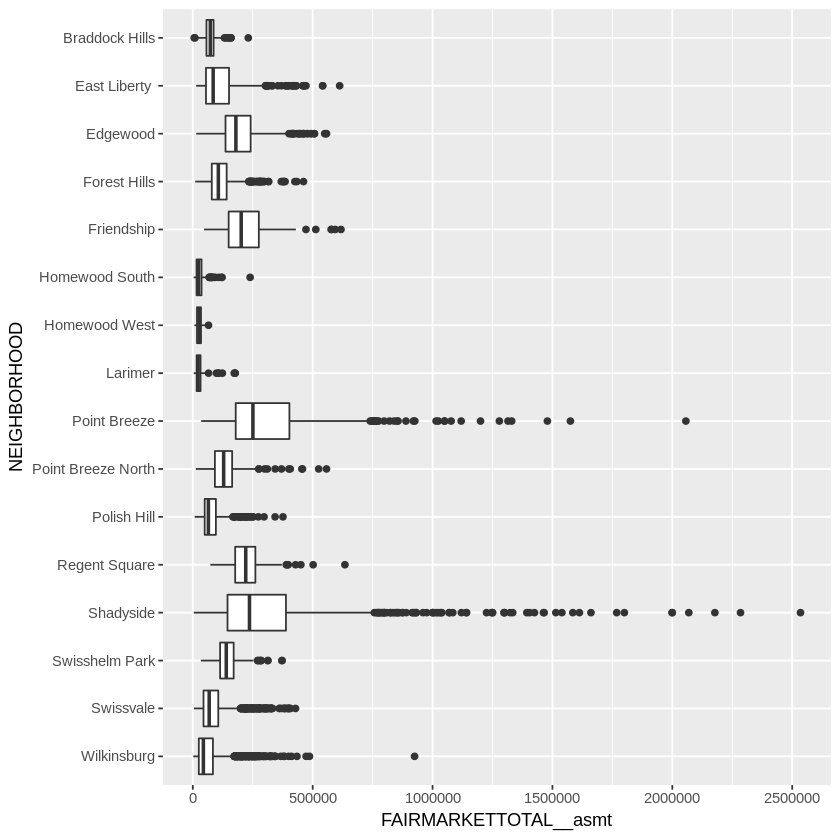

In [18]:
#another way to plot
qplot(NEIGHBORHOOD, FAIRMARKETTOTAL__asmt, data = eastbusway_houses, geom = "boxplot") + 
coord_flip()

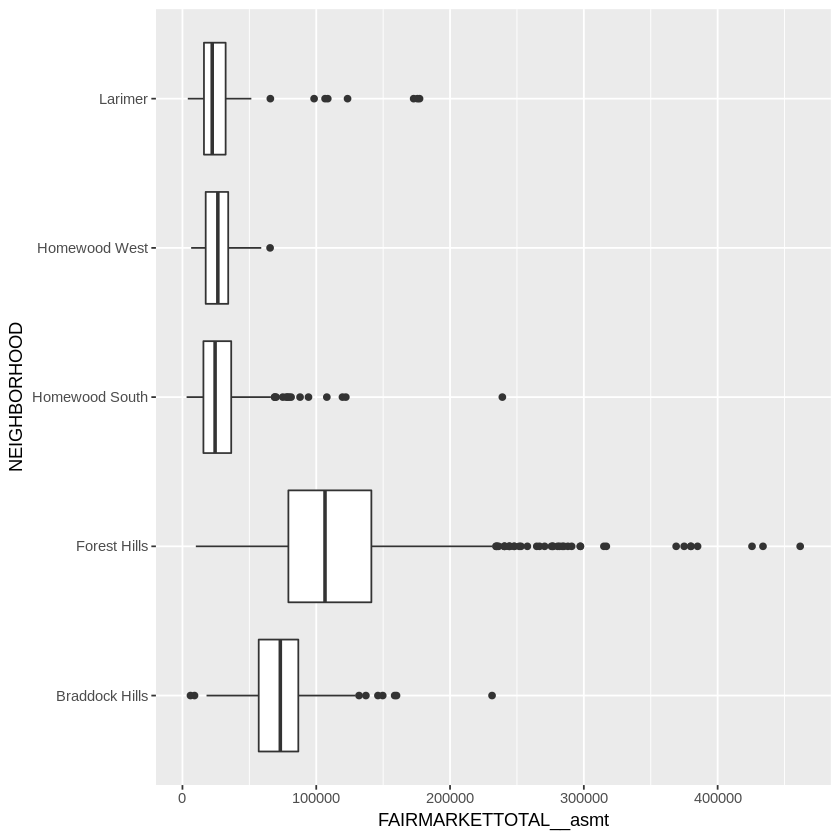

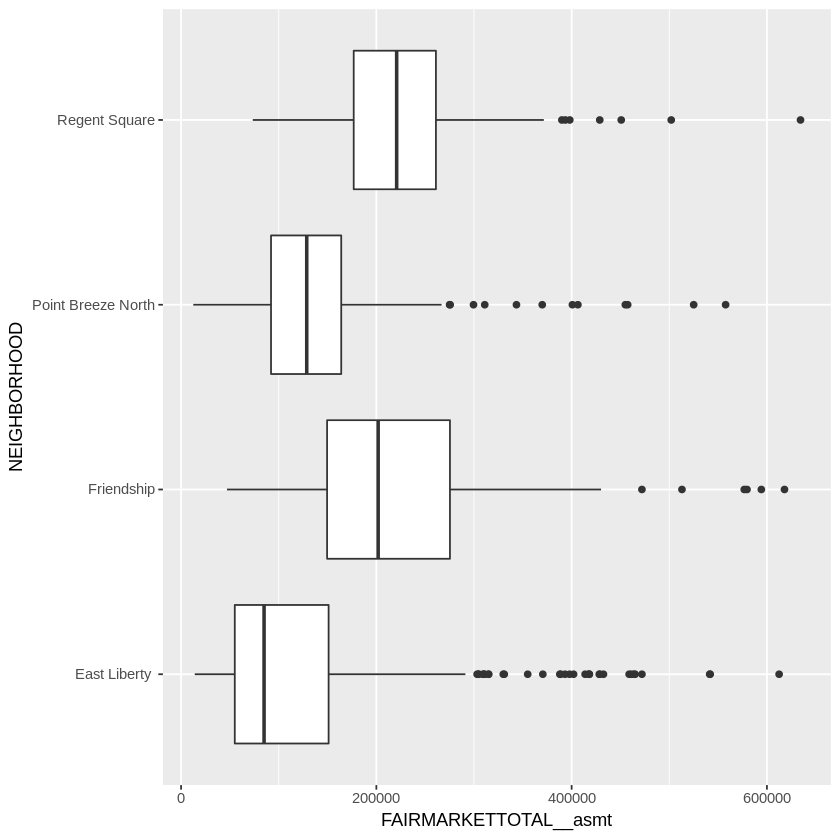

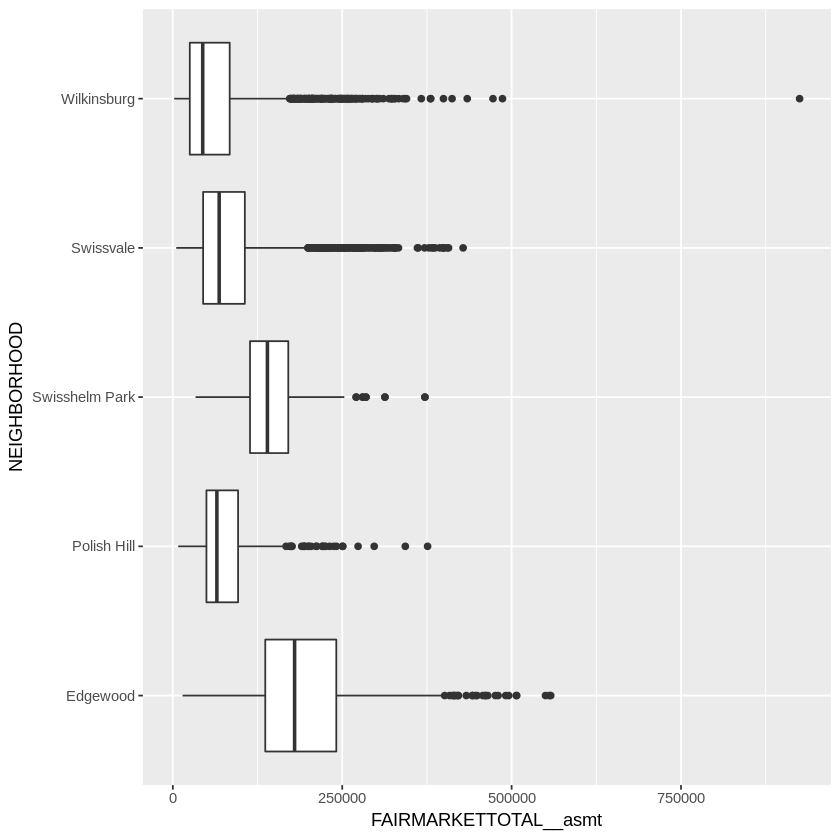

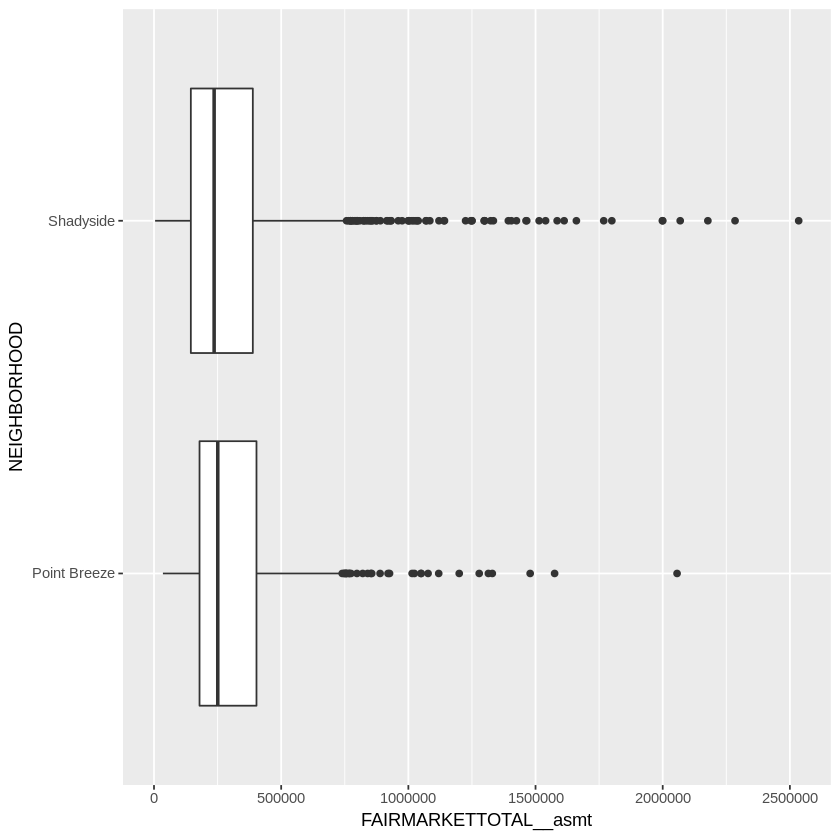

In [19]:
box_plot_set_1
box_plot_set_2
box_plot_set_3
box_plot_set_4

In [20]:
# changes order of print output
eastbusway_houses$NEIGHBORHOOD <- factor(eastbusway_houses$NEIGHBORHOOD, levels=rev(levels(eastbusway_houses$NEIGHBORHOOD)))

In [21]:
# summary stats by neighborhood
# I wonder how I can round these numbers...
# Is there an ability to include "n" for the total count for each neighborhood
tapply(eastbusway_houses$AGE, eastbusway_houses$NEIGHBORHOOD, summary, digits = 3)

$`Braddock Hills`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   28.0    65.0    71.0    77.6    89.5   146.0 

$`East Liberty `
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    96.0   110.0    98.8   121.0   161.0 

$Edgewood
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   29.0    91.0   101.0    98.5   114.0   161.0 

$`Forest Hills`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      6      62      74      75      91     161 

$Friendship
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     71     101     111     109     121     131 

$`Homewood South`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0    91.0   101.0    95.4   111.0   141.0 

$`Homewood West`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     91     101     111     111     121     131 

$Larimer
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     30     101     111     110     121     146 

$`Point Breeze`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      4      87      97   

In [22]:
#changes order of print output 
eastbusway_houses$NEIGHBORHOOD <- factor(eastbusway_houses$NEIGHBORHOOD, levels=rev(levels(eastbusway_houses$NEIGHBORHOOD)))

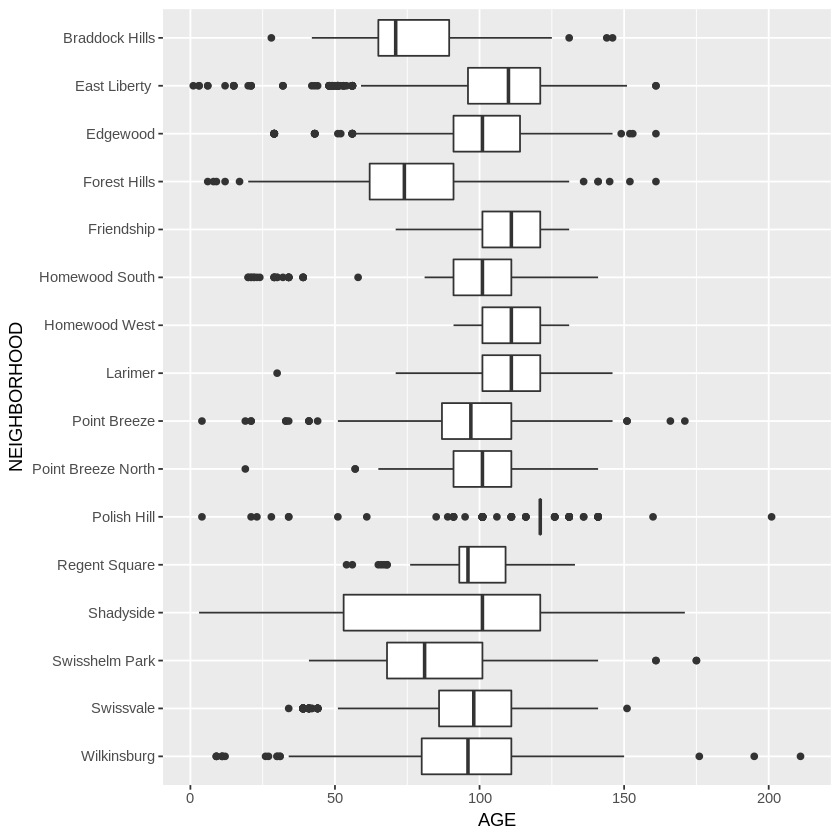

In [23]:
ggplot(eastbusway_houses, aes(NEIGHBORHOOD, AGE)) +
    geom_boxplot() +
    coord_flip()

In [24]:
eastbusway_houses$NEIGHBORHOOD <- factor(eastbusway_houses$NEIGHBORHOOD, levels=rev(levels(eastbusway_houses$NEIGHBORHOOD)))

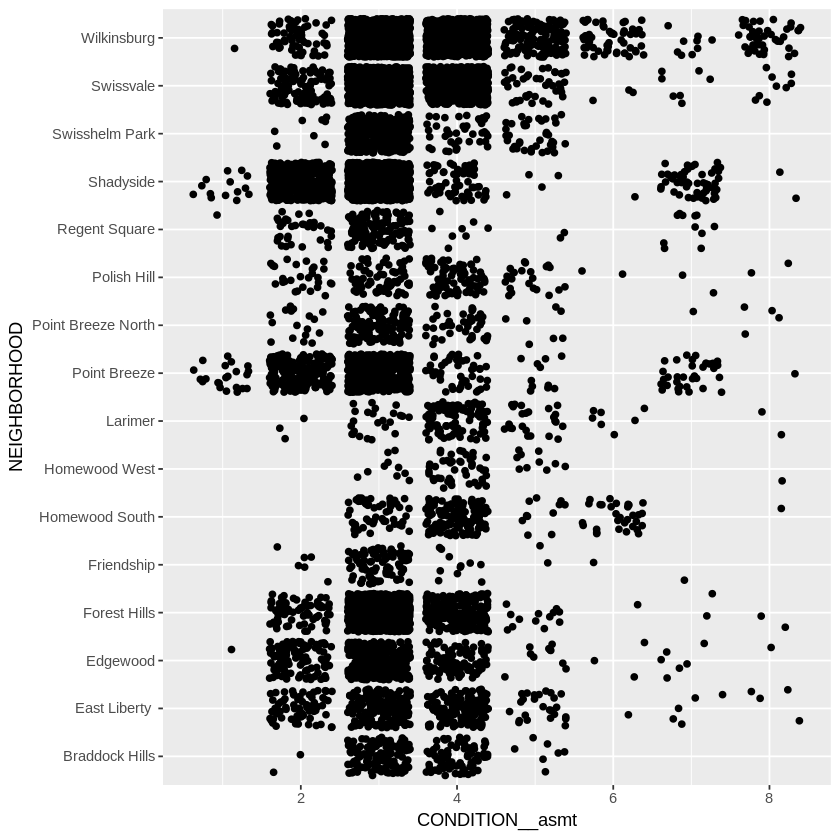

In [25]:
ggplot(eastbusway_houses, aes(NEIGHBORHOOD, CONDITION__asmt)) +
    geom_jitter() +
    coord_flip()

In [27]:
eastbusway_houses$NEIGHBORHOOD <- factor(eastbusway_houses$NEIGHBORHOOD, levels = rev(levels(eastbusway_houses$NEIGHBORHOOD)))

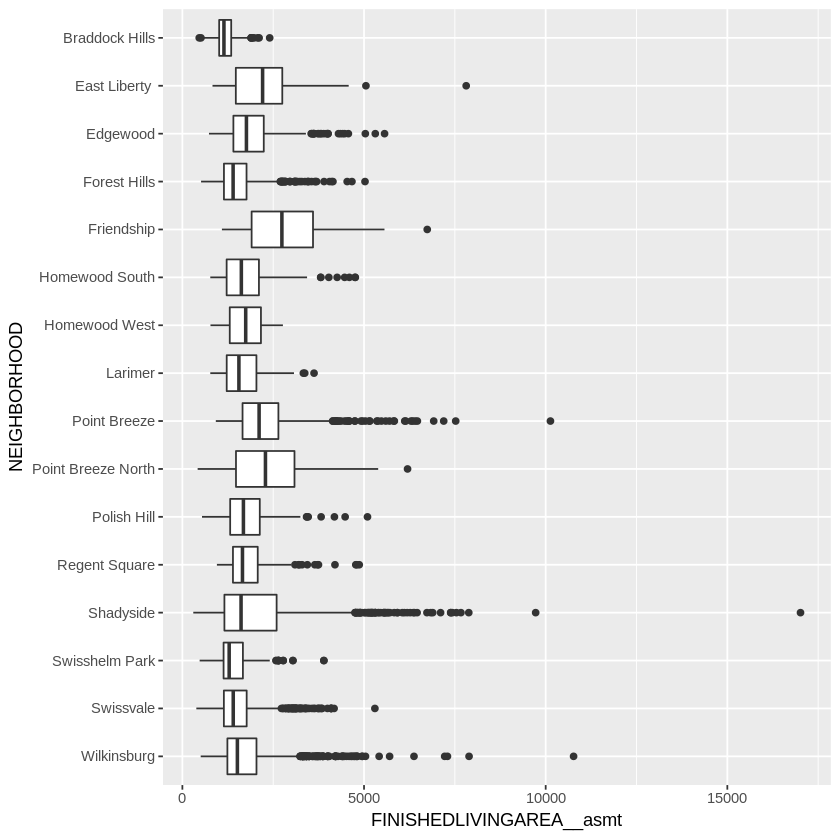

In [36]:
ggplot(eastbusway_houses, aes(NEIGHBORHOOD, FINISHEDLIVINGAREA__asmt)) +
    geom_boxplot() + 
    coord_flip()

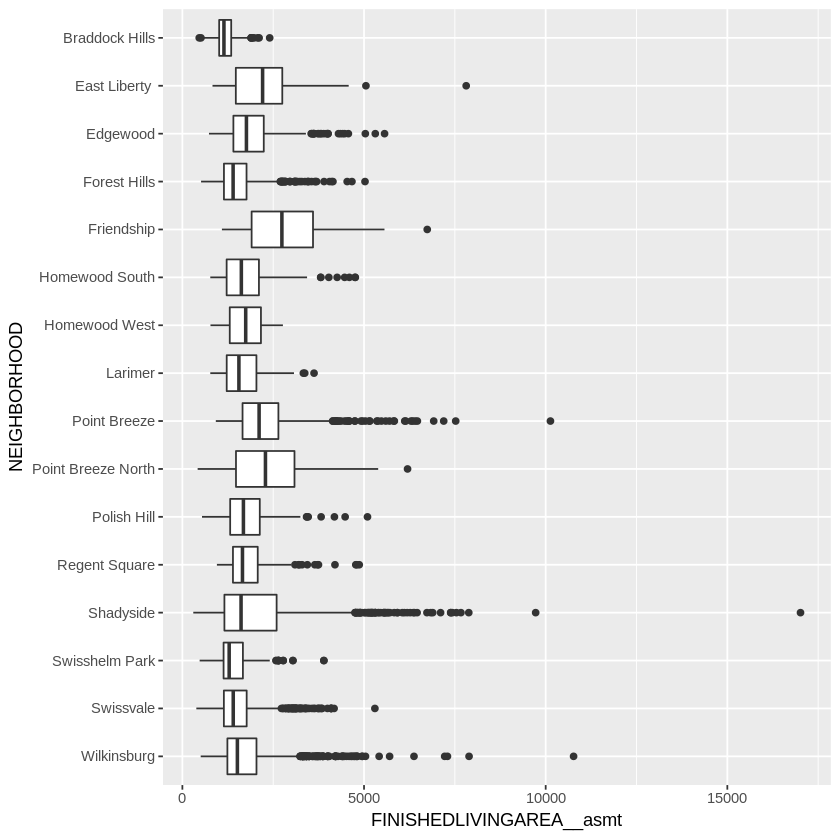

In [37]:
ggplot(eastbusway_houses, aes(NEIGHBORHOOD, FINISHEDLIVINGAREA__asmt)) +
    geom_boxplot() + 
    coord_flip()